# PA1: K-Nearest Neighbors 
Machine Learning projected 2024

<center>
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/10/Develop-k-Nearest-Neighbors-in-Python-From-Scratch.png">
</center>


## Part 1: KNNs from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
import PIL
!pip install idx2numpy
import idx2numpy

In [ ]:
train_images_path = "mnist/train-images.idx3-ubyte"
train_labels_path = "mnist/train-labels.idx1-ubyte"
test_images_path = "mnist/t10k-images.idx3-ubyte"
test_labels_path = "mnist/t10k-labels.idx1-ubyte"

train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [ ]:

flattened_train = np.reshape(train_images, (60000, 784))
flattened_test = np.reshape(test_images, (10000, 784))

train_data = np.insert(flattened_train, 784, train_labels, axis=1)
test_data = np.insert(flattened_test, 784, test_labels, axis=1)

train_df = train_data
test_df = test_data

print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Train set shape: (60000, 785)
Test set shape: (10000, 785)


In [ ]:
train_x = train_df[:, :-1]
train_y = train_df[:, -1]
test_x = test_df[:, :-1]
test_y = test_df[:,-1]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


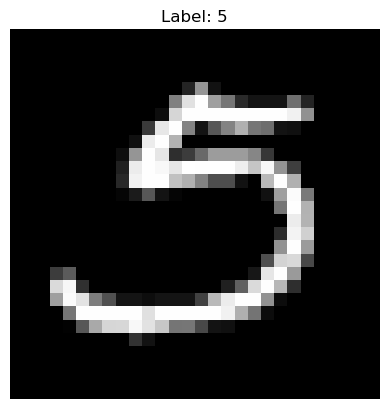

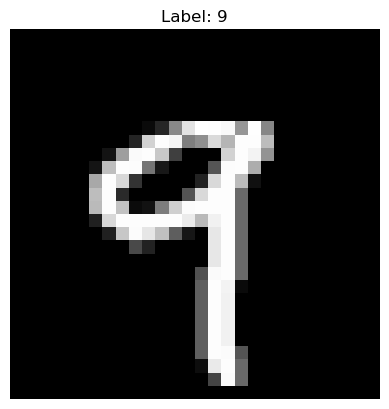

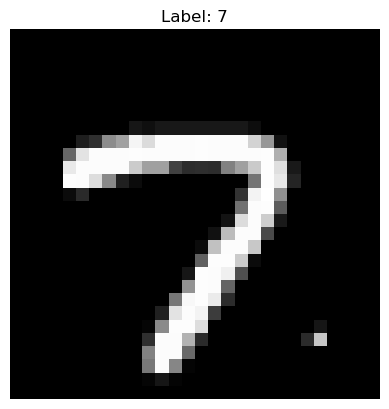

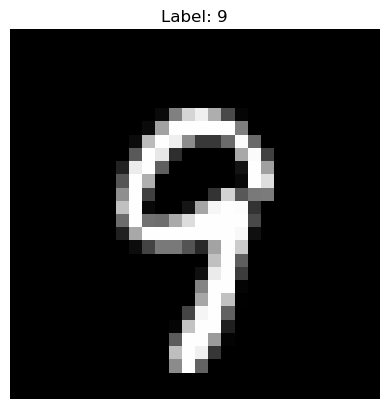

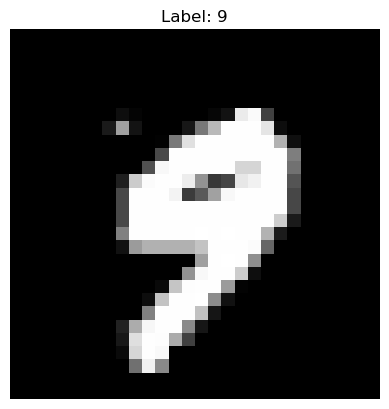

In [ ]:
def display_image(features, label):
    '''
    Takes a 1D numpy array, reshapes to a 28x28 array, and displays the image with the label as the title.
    '''
    image = features.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

o = [1, 2, 3, 4, 5]
for i in o:
  ind = np.random.randint(0, train_x.shape[0])
  display_image(train_x[ind], train_y[ind])


In [ ]:
def normalize(data):
  '''
    scales the data to the range [0, 1]
  '''
  normalized = data/255
  return normalized

train_x_normalized = normalize(train_x)
test_x_normalized = normalize(test_x)

### Implementing k-NN Classifier 

In [ ]:
class KNN:

  def __init__(self, k):
    '''
      Initializes the class
    '''

    self.k = k
    self.train_x = None
    self.train_y = None

  def euclidean_distance(self, x1, x2):
    '''
      Takes two numpy arrays and calculates the euclidean distance between them
    '''
    x = np.sqrt(np.sum((x1 - x2) ** 2))
    return x


  def manhattan_distance(self, x1, x2):
    '''
      Takes two numpy arrays and calculates the manhattan distance between them
    '''
    x = np.sum(np.abs(x1 - x2))
    return x


  def fit(self, train_x, train_y):
    '''
      Stores the training dataset
    '''
    self.train_x = train_x
    self.train_y = train_y


  def get_neighbors(self, new_point, distancefunc):
    '''
      Takes a new point and returns the k nearest neighbors
      Hint: Sort the distances by their index to get the labels easily
    '''
    if distancefunc == 'euclidean':
      distancefunc = self.euclidean_distance
    elif distancefunc == 'manhattan':
      distancefunc = self.manhattan_distance

    distances = [distancefunc(training_point, new_point) for training_point in self.train_x]
    sorted_indices = np.argsort(distances)
    n_ns = sorted_indices[:self.k]
    return n_ns

  def predict(self, test_x, distancefunc):
    '''
      Takes a test set and returns the predicted labels
    '''
    predictions = []
    for new_point in test_x:
        n_ns = self.get_neighbors(new_point, distancefunc)
        nlabel = self.train_y[n_ns].astype(int)
        curr = self.k
        while curr > 0:
            lcount = np.bincount(nlabel[:curr])
            mcount = np.max(lcount)
            mfreq = np.where(lcount == mcount)[0]
            if len(mfreq) == 1:
                predictions.append(mfreq[0])
                break
            else:
                curr -= 1

        if curr == 0:
            predictions.append(mfreq[0])

    final = np.array(predictions, dtype=int)
    return final


### Evaluation 

In [ ]:
def accuracy(predicted_labels, true_labels):
  '''
    Takes the predicted labels and the true labels and returns the accuracy
  '''
  correct_predictions = np.sum(predicted_labels == true_labels)
  total_predictions = len(true_labels)
  acc = correct_predictions / total_predictions
  return acc


def make_confusion_matrix(predicted_labels, true_labels):
  '''
    Takes the predicted labels and the true labels and returns the confusion matrix
    Hint: You can create a helper function which calculates each row of the confusion matrix
  '''
  unique_labels = np.unique(np.concatenate([true_labels, predicted_labels]))
  num_classes = len(unique_labels)
  confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
  for i in range(len(true_labels)):
    confusion_matrix[int(true_labels[i]), int(predicted_labels[i])] += 1

  return confusion_matrix


def make_heat_map(confusion_matrix, title):
  '''
    Takes the confusion matrix and plots it as a heatmap
  '''
  plt.figure(figsize=(10, 7))
  sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='d')
  plt.title(title)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


def precision(confusion_matrix, class_label):
  '''
    Takes the confusion matrix and a label and returns the precision
  '''
  truepos = confusion_matrix[class_label][class_label]
  all_positives = np.sum(confusion_matrix[:,class_label])
  precision = truepos / all_positives
  return precision


def recall(confusion_matrix, class_label):
  '''
    Takes the confusion matrix and a label and returns the recall
  '''
  true_positives = confusion_matrix[class_label, class_label]
  actual_positives = np.sum(confusion_matrix[class_label, :])
  recall = true_positives / actual_positives
  return recall


def f1_score(precision, recall):
  '''
    Takes the precision and recall and returns the f1 score
  '''
  if precision + recall == 0:
      return 0
  f1 = 2 * (precision * recall) / (precision + recall)
  return f1


def macro_average_f1(confusion_matrix):
  '''
    Calculates the macro-average F1 score from a provided confusion matrix, over all classes
  '''
  num_classes = confusion_matrix.shape[0]
  f1_scores = []

  for class_label in range(num_classes):
      precision_value = precision(confusion_matrix, class_label)
      recall_value = recall(confusion_matrix, class_label)
      f1 = f1_score(precision_value, recall_value)
      f1_scores.append(f1)

  mac_f1 = np.mean(f1_scores)
  return mac_f1


def evaluate(predicted_labels, true_labels):
  '''
    Displays and returns a nicely formatted report with accuracy, macro-average f1 score, and confusion matrix
  '''
  cm = make_confusion_matrix(predicted_labels, true_labels)
  acc = accuracy(predicted_labels, true_labels)
  macro_f1 = macro_average_f1(cm)

  print("Confusion Matrix:")
  make_heat_map(cm, "Confusion Matrix Heatmap")
  print("----------------------------------")
  print(f"Accuracy: {acc:.4f}")
  print(f"Macro-Average F1 Score: {macro_f1:.4f}")
  print("----------------------------------")

  return acc, macro_f1, cm

### k-fold Cross Validation 

<center>
    <img src="https://global.discourse-cdn.com/dlai/original/3X/a/3/a3ed2de61c2b4fa00f1b7e939753e1a7e181afb0.png">
</center>


In [ ]:
def k_fold_split(num_folds, cv_no, train_x, train_y):
    '''
    Creates the train and test splits based off the value of k

    Parameters
    ----------
    mum_folds : int
        Number of folds
    cv_no : int
        The current fold number
    train_x : nparray
        The features
    train_y : nparray
        The labels
    '''
    training_length = len(train_x)
    fold_size = training_length // num_folds

    sind = cv_no * fold_size
    eind = sind + fold_size

    val_x_fold = train_x[sind:eind]
    val_y_fold = train_y[sind:eind]

    t1s = train_x[:sind]
    t1e = train_x[eind:]
    t2s = train_y[:sind]
    t2e = train_y[eind:]

    train_x_fold = np.concatenate([t1s, t1e])
    train_y_fold = np.concatenate([t2s, t2e])

    return train_x_fold, train_y_fold, val_x_fold, val_y_fold

def k_fold_cross_validation(num_folds, k, train_x, train_y, distanceFunction):
    """
    Returns the predictions for all the data points in the dataset using k-fold cross validation

    num_folds: int
      Number of folds
    k: int
      Number of neighbours to consider (hyperparameter)
    train_x : nparray
        The features
    train_y : nparray
        The labels
    distanceFunction : str
        Distance metric specified (manhattan / euclidean)
    """
    predictions = np.array([], dtype=int)
    for i in range(num_folds):
        knn = KNN(k)
        trainfold_x, trainfold_y, valdfoldx, xxx = k_fold_split(num_folds, i, train_x, train_y)
        knn.fit(trainfold_x, trainfold_y)

        label_predicted = knn.predict(valdfoldx, distanceFunction)
        predictions = np.concatenate([predictions,label_predicted])

    return predictions

In [ ]:
accuracy_list_euclidean = []
f1_list_euclidean = []
accuracy_list_manhattan = []
f1_list_manhattan = []

data = np.hstack((train_x_normalized, train_y.reshape(-1, 1)))
sampled_data = data[np.random.choice(data.shape[0], 14000, replace=False)]
sampled_train_x = sampled_data[:, :-1]
sampled_train_y = sampled_data[:, -1]

k_values = [1, 2, 3, 4, 5]


In [ ]:
for k in k_values:
    print("----------------------------------")
    print(f"Euclidean Distance for K = {k}:")
    predictions_euclidean = k_fold_cross_validation(5, k, sampled_train_x, sampled_train_y, "euclidean")
    acc_euclidean = accuracy(predictions_euclidean, sampled_train_y)
    accuracy_list_euclidean.append(acc_euclidean)
    print(f"Accuracy: {acc_euclidean:.4f}")
    temp = make_confusion_matrix(predictions_euclidean, sampled_train_y)
    f1_euclidean = macro_average_f1(temp)
    f1_list_euclidean.append(f1_euclidean)
    print(f"F1 Score: {f1_euclidean:.4f}")
    print("----------------------------------")
    print(f"Manhattan Distance for K = {k}:")
    predictions_manhattan = k_fold_cross_validation(5, k, sampled_train_x, sampled_train_y, "manhattan")
    acc_manhattan = accuracy(predictions_manhattan, sampled_train_y)
    accuracy_list_manhattan.append(acc_manhattan)
    print(f"Accuracy: {acc_manhattan:.4f}")
    temp1 = make_confusion_matrix(predictions_manhattan, sampled_train_y)
    f1_manhattan = macro_average_f1(temp1)
    f1_list_manhattan.append(f1_manhattan)
    print(f"F1 Score: {f1_manhattan:.4f}")
    print("----------------------------------")


----------------------------------
Euclidean Distance for K = 1:
Accuracy: 0.9533
F1 Score: 0.9527
----------------------------------
Manhattan Distance for K = 1:
Accuracy: 0.9440
F1 Score: 0.9433
----------------------------------
----------------------------------
Euclidean Distance for K = 2:
Accuracy: 0.9533
F1 Score: 0.9527
----------------------------------
Manhattan Distance for K = 2:
Accuracy: 0.9440
F1 Score: 0.9433
----------------------------------
----------------------------------
Euclidean Distance for K = 3:
Accuracy: 0.9557
F1 Score: 0.9553
----------------------------------
Manhattan Distance for K = 3:
Accuracy: 0.9481
F1 Score: 0.9477
----------------------------------
----------------------------------
Euclidean Distance for K = 4:
Accuracy: 0.9561
F1 Score: 0.9558
----------------------------------
Manhattan Distance for K = 4:
Accuracy: 0.9479
F1 Score: 0.9475
----------------------------------
----------------------------------
Euclidean Distance for K = 5:
Acc

Next, present the results as a graph with `k` values on the x-axis and classification accuracy on the y-axis. Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric).

Make another graph but with the F1-score on the y-axis this time. The graphs should be properly labeled on axes, with a title, and a legend.

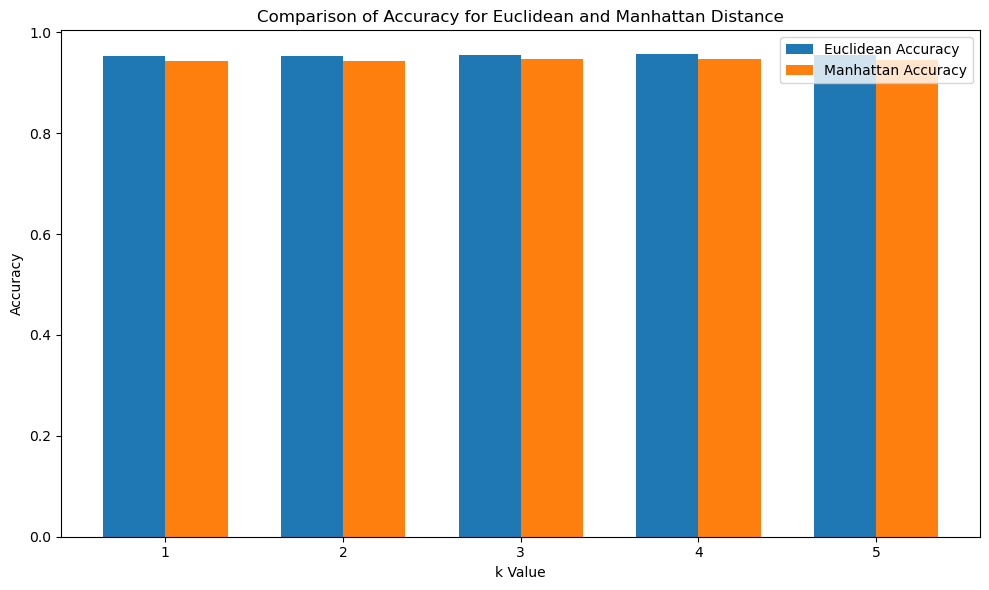

In [ ]:
bar_width = 0.35
index = np.arange(len(k_values))

plt.figure(figsize=(10, 6))
plt.bar(index, accuracy_list_euclidean, bar_width, label='Euclidean Accuracy')
plt.bar(index + bar_width, accuracy_list_manhattan, bar_width, label='Manhattan Accuracy')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Euclidean and Manhattan Distance')
plt.xticks(index + bar_width / 2, k_values)
plt.legend()

plt.tight_layout()
plt.show()

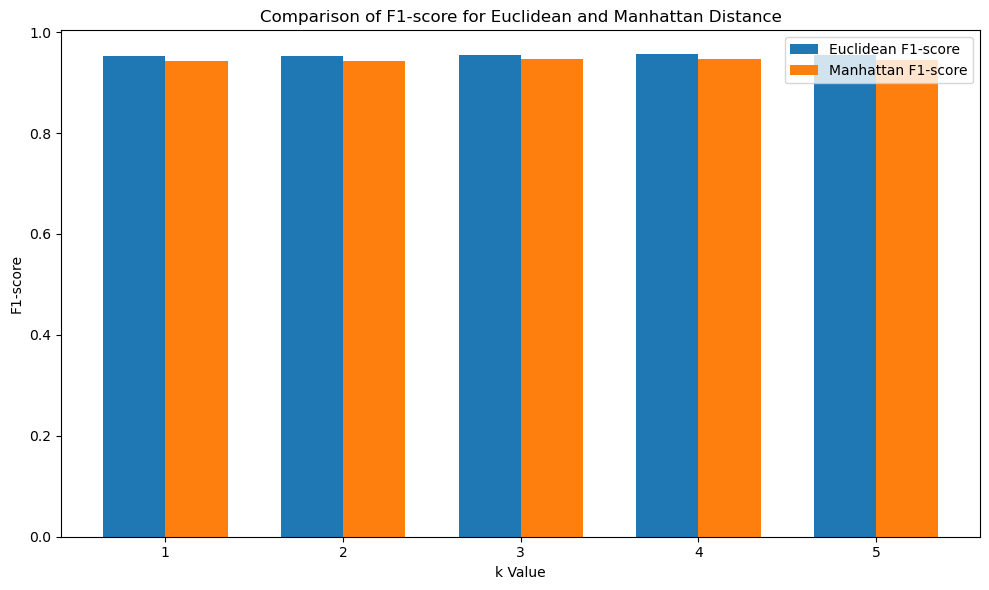

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(index, f1_list_euclidean, bar_width, label='Euclidean F1-score')
plt.bar(index + bar_width, f1_list_manhattan, bar_width, label='Manhattan F1-score')

plt.xlabel('k Value')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Euclidean and Manhattan Distance')
plt.xticks(index + bar_width / 2, k_values)
plt.legend()

plt.tight_layout()
plt.show()

### Prediction 

Confusion Matrix:


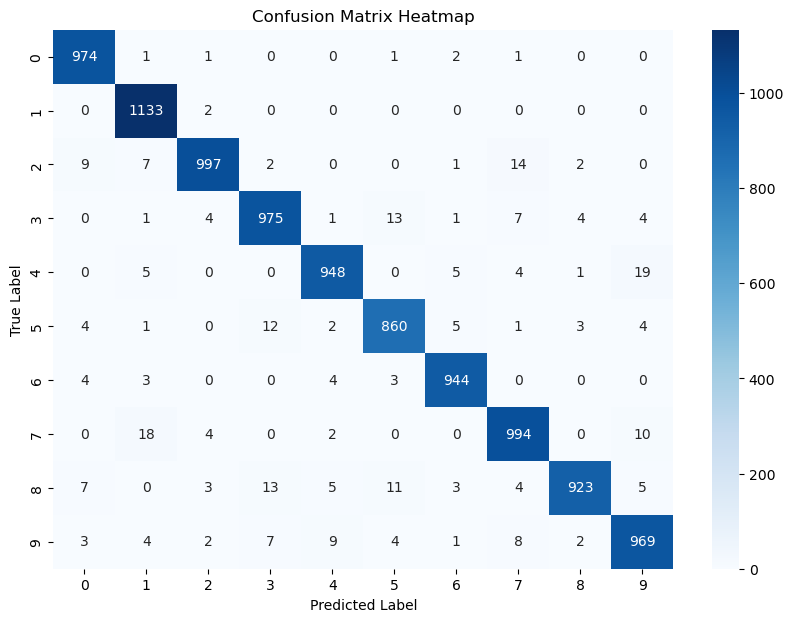

----------------------------------
Accuracy: 0.9717
Macro-Average F1 Score: 0.9715
----------------------------------


In [ ]:
best_k = 3
#best_k = np.argmax(accuracy_list_euclidean) + 1
knn_euclidean = KNN(best_k)
knn_euclidean.fit(train_x_normalized, train_y)
predictions_euclidean = knn_euclidean.predict(test_x_normalized, "euclidean")

accuracy_euclidean, f1_euclidean, cm_euclidean = evaluate(predictions_euclidean, test_y)


Confusion Matrix:


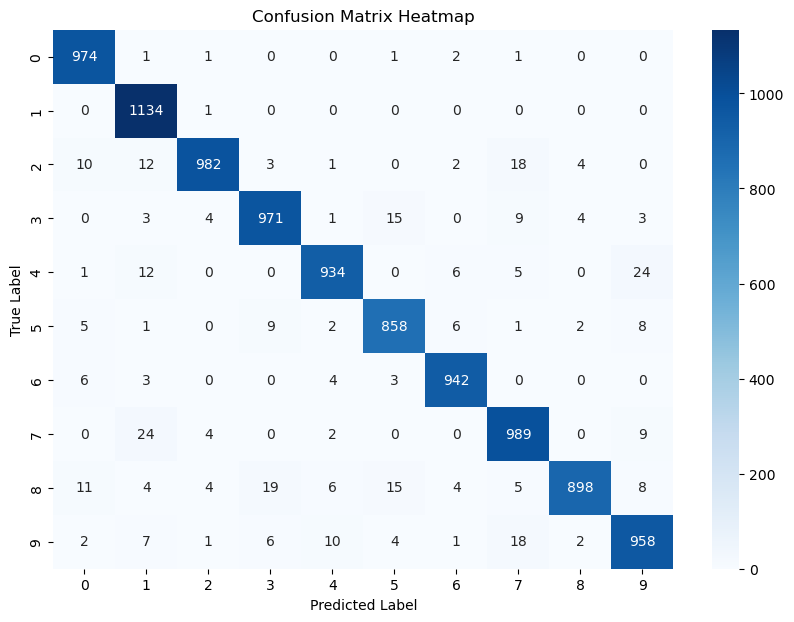

----------------------------------
Accuracy: 0.9640
Macro-Average F1 Score: 0.9639
----------------------------------


In [ ]:
knn_manhattan = KNN(best_k)
knn_manhattan.fit(train_x_normalized, train_y)
predictions_mmm = knn_manhattan.predict(test_x_normalized, "manhattan")

accuracy_manhattan, f1_manhattan, cm_manhattan = evaluate(predictions_mmm, test_y)


## KNN using Scikit-Learn [10 marks]



In [16]:
#!pip install scikit-learn==1.4.2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Euclidean Distance - Best k = 3
Accuracy: 0.9705
Macro F1 Score: 0.9704


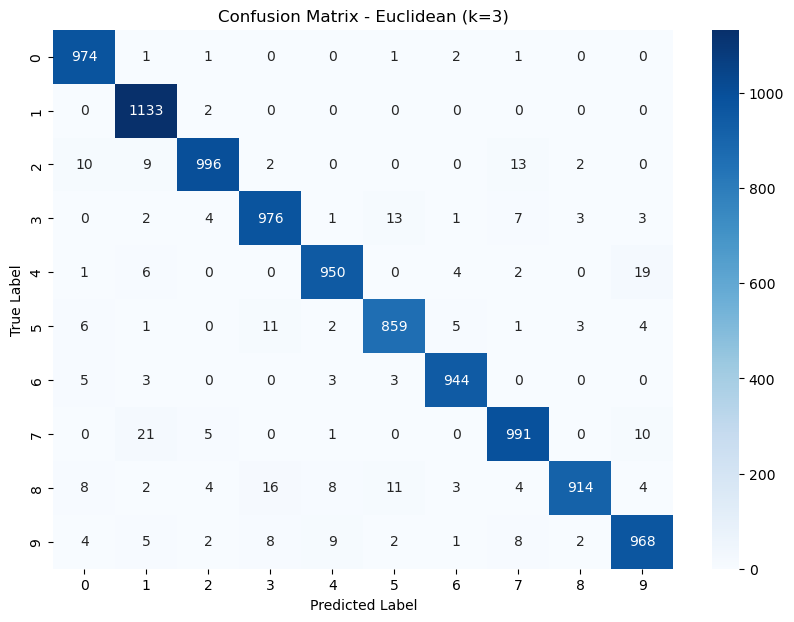

In [ ]:

best_k_euclidean = best_k
knn_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
knn_euclidean.fit(train_x_normalized, train_y)
predictions_euclidean = knn_euclidean.predict(test_x_normalized)

accuracy_euclidean = accuracy_score(test_y, predictions_euclidean)
report_euclidean = classification_report(test_y, predictions_euclidean, output_dict=True)
f1_euclidean = report_euclidean['macro avg']['f1-score']
cm_euclidean = confusion_matrix(test_y, predictions_euclidean)

print(f"Euclidean Distance - Best k = {best_k_euclidean}")
print(f"Accuracy: {accuracy_euclidean:.4f}")
print(f"Macro F1 Score: {f1_euclidean:.4f}")

plt.figure(figsize=(10, 7))
sns.heatmap(cm_euclidean, annot=True, fmt="d", cmap="Blues")
plt.title(f'Confusion Matrix - Euclidean (k={best_k_euclidean})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Manhattan Distance - Best k = 3
Accuracy: 0.9633
Macro F1 Score: 0.9632


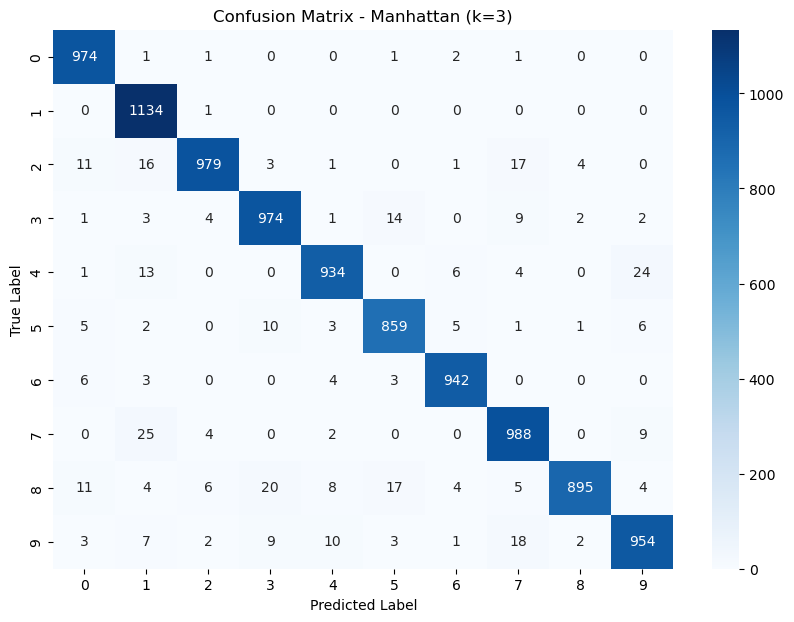

In [ ]:

best_k_manhattan = best_k
kn_man = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
kn_man.fit(train_x_normalized, train_y)
pred_mm = kn_man.predict(test_x_normalized)

accuracy_manhattan = accuracy_score(test_y, pred_mm)
report_manhattan = classification_report(test_y, pred_mm, output_dict=True)
f1_manhattan = report_manhattan['macro avg']['f1-score']
cm_manhattan = confusion_matrix(test_y, pred_mm)

print(f"Manhattan Distance - Best k = {best_k_manhattan}")
print(f"Accuracy: {accuracy_manhattan:.4f}")
print(f"Macro F1 Score: {f1_manhattan:.4f}")

plt.figure(figsize=(10, 7))
sns.heatmap(cm_manhattan, annot=True, fmt="d", cmap="Blues")
plt.title(f'Confusion Matrix - Manhattan (k={best_k_manhattan})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Radius nearest neighbors 
<center>
    <img src="https://media.springernature.com/m312/springer-static/image/art%3A10.1134%2FS1054661820030268/MediaObjects/11493_2020_6090_Fig5_HTML.gif?">
</center>

For this part, this dataset was used [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).

In [ ]:
import pandas as pd
df = pd.read_csv('breast-cancer.csv')
print(df.shape)
print(df.head())

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

In [ ]:
df = df.drop(columns=['id'],axis=1)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
train_dataset = df.sample(frac=0.8)
test_dataset = df.drop(train_dataset.index)
train_x = train_dataset.drop("diagnosis", axis=1)
train_y = train_dataset["diagnosis"]
test_x = test_dataset.drop("diagnosis", axis=1)
test_y = test_dataset["diagnosis"]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [ ]:
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()
train_mean = np.mean(train_x, axis=0)
train_std = np.std(train_x, axis=0)
train_x_standardized = (train_x - train_mean) / train_std
test_mean = np.mean(train_x, axis=0)
test_std = np.std(train_x, axis=0)
test_x_standardized = (test_x - test_mean) / test_std
print(train_x_standardized[:5])
print(test_x_standardized[:5])

[[ 1.49308684e-01 -1.21421247e+00  1.10545067e-01  5.83929707e-03
   9.55602306e-01 -2.25977277e-01 -2.40539763e-01  4.54187008e-01
  -5.62165244e-01 -2.45572247e-01 -3.43814951e-01 -9.04174095e-01
  -3.48924408e-01 -3.18021747e-01 -2.99983184e-01 -7.25410527e-01
  -5.40328465e-01 -7.22382222e-02  1.84892526e-01 -9.60584456e-02
  -7.11672835e-02 -1.41589197e+00 -1.00586041e-01 -2.05121591e-01
   8.99853924e-02 -6.73436589e-01 -6.55892658e-01 -1.07916298e-01
  -4.82891126e-01 -3.40192949e-01]
 [ 1.02336622e+00  4.55244890e+00  9.56173361e-01  8.43577921e-01
   1.15199984e-01  4.79007165e-01  7.05890700e-01  1.07496854e+00
   1.21483575e-03 -4.62249123e-01  5.18912751e-01 -6.50672979e-01
   9.12222874e-02  2.46646678e-01 -7.25190912e-01  1.37834788e-01
  -1.99026915e-01  3.15928100e-01 -9.85333082e-01 -4.00050914e-01
   1.38760794e+00  3.10274505e+00  1.09052105e+00  1.03477356e+00
   1.70277848e-01  7.37465942e-01  2.64574645e-01  1.44990790e+00
  -8.78114894e-02  3.10397283e-02]
 [ 3.2

### Implementing r-NN Classifier [10 marks]

In [ ]:
class RNN:

  def __init__(self, r):
    '''
      Initializes the class
    '''

    self.r = r
    self.train_x = None
    self.train_y = None

  def euclidean_distance(self, x1, x2):
    '''
      Takes two numpy arrays and calculates the euclidean distance between them
    '''
    x = np.sqrt(np.sum((x1 - x2)**2))
    return x

  def manhattan_distance(self, x1, x2):
    '''
      Takes two numpy arrays and calculates the manhattan distance between them
    '''
    x = np.sum(np.abs(x1 - x2))
    return x

  def fit(self, train_x, train_y):
    '''
      Stores the training dataset
    '''
    self.train_x = train_x
    self.train_y = train_y

  def get_neighbors(self, new_point, distancefunc):
    '''
      Takes a new point and returns the nearest neighbors within the radius r
      Hint: Sort the distances by their index to get the labels easily
    '''
    if distancefunc == 'euclidean':
      distancefunc = self.euclidean_distance
    elif distancefunc == 'manhattan':
      distancefunc = self.manhattan_distance

    distances = [distancefunc(train_point,new_point) for train_point in self.train_x]
    sorted_indices = np.argsort(distances)

    res = []
    l = len(sorted_indices)
    for i in range(l):
      if self.r < distances[sorted_indices[i]]:
        break
      res.append(sorted_indices[i])

    return res

  def predict(self, test_x, distancefunc):
    '''
      Takes a test set and returns the predicted labels
    '''
    labels = []

    backupclass = np.bincount(self.train_y).argmax()

    for test_point in test_x:
        neighbors_indices = self.get_neighbors(test_point, distancefunc)

        if len(neighbors_indices) == 0:
            labels.append(backupclass)
        else:
            nlabel = self.train_y[neighbors_indices]
            ncount = len(nlabel)

            while ncount > 0:
                lcount = np.bincount(nlabel[:ncount])
                mcount = np.max(lcount)
                mfreq = np.where(lcount == mcount)[0]
                if len(mfreq) == 1:
                    labels.append(mfreq[0])
                    break
                else:
                    ncount -= 1

            if ncount == 0:
                labels.append(mfreq[0])

    res = np.array(labels, dtype=int)
    return res

### k-fold Cross Validation

In [ ]:
def k_fold_cross_validation_rnn(num_folds, r, train_x, train_y, distanceFunction):
  """
    Returns the predictions for all the data points in the dataset using k-fold cross validation

    num_folds: int
      Number of folds
    r: float
      Radius of neighbours to consider (hyperparameter)
    train_x: np array
      The dataset features to be used
    test_x: np array
      The dataset labels to be used
    distancefunc: str
      The distance function to be used
    """

  predictions = np.array([], dtype=int)
  samples = train_x.shape[0]
  fold_size = samples // num_folds

  for i in range(num_folds):
    sind = i * fold_size
    eind = sind + fold_size

    validation_set_x = train_x[sind:eind]

    t1s = train_x[:sind]
    t1e = train_x[eind:]
    t2s = train_y[:sind]
    t2e = train_y[eind:]

    train_set_x = np.concatenate((t1s, t1e))
    train_set_y = np.concatenate((t2s, t2e))

    rnn = RNN(r)
    rnn.fit(train_set_x, train_set_y)

    predicted_labels = rnn.predict(validation_set_x, distanceFunction)
    predictions = np.concatenate([predictions,predicted_labels])

  return predictions

In [ ]:
r_values_euclidean = np.linspace(3.5, 5.5, 20)
r_values_euclidean = np.sort(r_values_euclidean)

r_values_manhattan = np.linspace(15.5, 17.5, 20)
r_values_manhattan = np.sort(r_values_manhattan)

accuracy_list_euclidean = []
f1_list_euclidean = []
accuracy_list_manhattan = []
f1_list_manhattan = []


In [ ]:
for r in r_values_euclidean:
    print("----------------------------------")
    print(f"Euclidean Distance for R = {r}:")
    predictions_euclidean = k_fold_cross_validation_rnn(5, r, train_x_standardized, train_y, "euclidean")

    temp = classification_report(train_y, predictions_euclidean, output_dict=True, zero_division=0)
    f1_euclidean = temp['macro avg']['f1-score']
    print(f"Macro-average F1 score: {f1_euclidean:.4f}")
    f1_list_euclidean.append(f1_euclidean)

    acc_euclidean = accuracy_score(train_y, predictions_euclidean)
    print(f"Accuracy: {acc_euclidean:.4f}")
    accuracy_list_euclidean.append(acc_euclidean)
    print("----------------------------------")
    print("\n")


----------------------------------
Euclidean Distance for R = 3.5:
Macro-average F1 score: 0.8538
Accuracy: 0.8747
----------------------------------


----------------------------------
Euclidean Distance for R = 3.6052631578947367:
Macro-average F1 score: 0.8556
Accuracy: 0.8769
----------------------------------


----------------------------------
Euclidean Distance for R = 3.7105263157894735:
Macro-average F1 score: 0.8664
Accuracy: 0.8857
----------------------------------


----------------------------------
Euclidean Distance for R = 3.8157894736842106:
Macro-average F1 score: 0.8607
Accuracy: 0.8813
----------------------------------


----------------------------------
Euclidean Distance for R = 3.9210526315789473:
Macro-average F1 score: 0.8697
Accuracy: 0.8879
----------------------------------


----------------------------------
Euclidean Distance for R = 4.026315789473684:
Macro-average F1 score: 0.8808
Accuracy: 0.8967
----------------------------------


--------------

In [ ]:

for r in r_values_manhattan:
    print("----------------------------------")
    print(f"Manhattan Distance for R = {r}:")
    predictions_manhattan = k_fold_cross_validation_rnn(5, r, train_x_standardized, train_y, "manhattan")

    temp = classification_report(train_y, predictions_manhattan, output_dict=True)
    f1_man = temp['macro avg']['f1-score']
    print(f"F1 Score: {f1_man:.4f}")
    f1_list_manhattan.append(f1_man)

    acc_man = accuracy_score(train_y, predictions_manhattan)
    print(f"Accuracy: {acc_man:.4f}")
    accuracy_list_manhattan.append(acc_man)
    print("----------------------------------")
    print("\n")


----------------------------------
Manhattan Distance for R = 15.5:
F1 Score: 0.8595
Accuracy: 0.8791
----------------------------------


----------------------------------
Manhattan Distance for R = 15.605263157894736:
F1 Score: 0.8646
Accuracy: 0.8835
----------------------------------


----------------------------------
Manhattan Distance for R = 15.710526315789474:
F1 Score: 0.8646
Accuracy: 0.8835
----------------------------------


----------------------------------
Manhattan Distance for R = 15.81578947368421:
F1 Score: 0.8646
Accuracy: 0.8835
----------------------------------


----------------------------------
Manhattan Distance for R = 15.921052631578947:
F1 Score: 0.8707
Accuracy: 0.8879
----------------------------------


----------------------------------
Manhattan Distance for R = 16.026315789473685:
F1 Score: 0.8707
Accuracy: 0.8879
----------------------------------


----------------------------------
Manhattan Distance for R = 16.13157894736842:
F1 Score: 0.8707

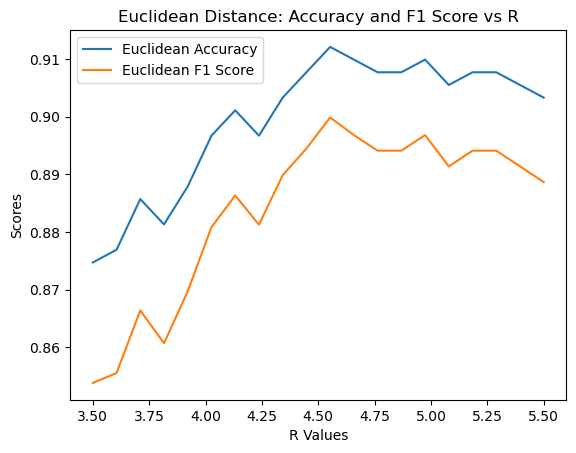

In [ ]:
plt.plot(r_values_euclidean, accuracy_list_euclidean, label="Euclidean Accuracy")
plt.plot(r_values_euclidean, f1_list_euclidean, label="Euclidean F1 Score")

plt.title('Euclidean Distance: Accuracy and F1 Score vs R')
plt.xlabel('R Values')
plt.ylabel('Scores')
plt.legend()
plt.show()

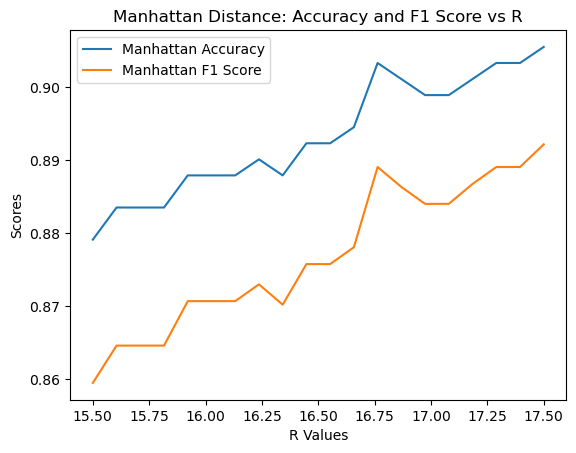

In [ ]:
plt.plot(r_values_manhattan, accuracy_list_manhattan, label="Manhattan Accuracy")
plt.plot(r_values_manhattan, f1_list_manhattan, label="Manhattan F1 Score")

plt.title('Manhattan Distance: Accuracy and F1 Score vs R')
plt.xlabel('R Values')
plt.ylabel('Scores')
plt.legend()
plt.show()

### Prediction [10 marks]

----------------------------------
Accuracy for Euclidean: 0.9123
Macro-average F1 score for Euclidean: 0.9037
Confusion Matrix for Euclidean: 


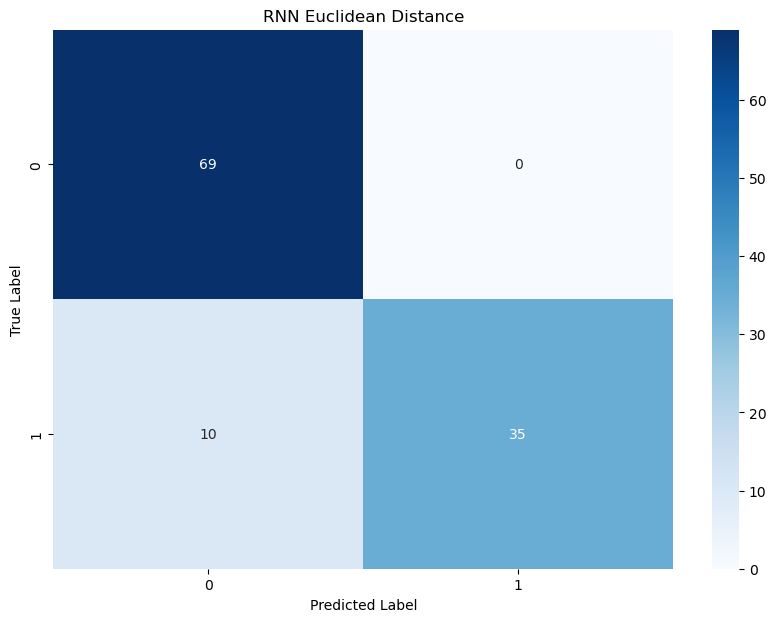

----------------------------------


In [ ]:

best_r = r_values_euclidean[np.argmax(accuracy_list_euclidean)]
rnn_euclidean = RNN(best_r)
rnn_euclidean.fit(train_x_standardized, train_y)
predicted_labels_euclidean = rnn_euclidean.predict(test_x_standardized, "euclidean")
print("----------------------------------")
accuracy_euclidan = accuracy_score(test_y, predicted_labels_euclidean)
print(f"Accuracy for Euclidean: {accuracy_euclidan:.4f}")

temp = classification_report(test_y, predicted_labels_euclidean, output_dict=True)
f1_euclidean = temp['macro avg']['f1-score']
print(f"Macro-average F1 score for Euclidean: {f1_euclidean:.4f}")

print("Confusion Matrix for Euclidean: ")
confusionmat = confusion_matrix(test_y, predicted_labels_euclidean)
make_heat_map(confusionmat, title="RNN Euclidean Distance")
print("----------------------------------")


----------------------------------
Accuracy for Manhattan: 0.9123
Macro-average F1 score for Manhattan: 0.9037
Confusion Matrix for Manhattan: 


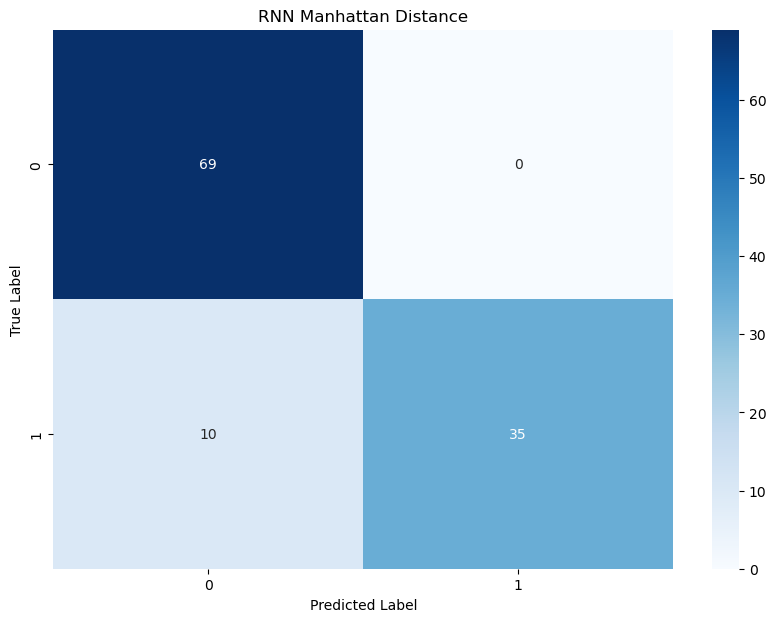

----------------------------------


In [ ]:

best_r = r_values_manhattan[np.argmax(accuracy_list_manhattan)]
rnn_manhattan = RNN(best_r)
rnn_manhattan.fit(train_x_standardized, train_y)
predicted_labels_for_manhattan = rnn_manhattan.predict(test_x_standardized, "manhattan")
print("----------------------------------")
accuracy_manhattan = accuracy_score(test_y, predicted_labels_for_manhattan)
print(f"Accuracy for Manhattan: {accuracy_manhattan:.4f}")

temp = classification_report(test_y, predicted_labels_for_manhattan, output_dict=True)
f1_manhattan = temp['macro avg']['f1-score']
print(f"Macro-average F1 score for Manhattan: {f1_manhattan:.4f}")

print("Confusion Matrix for Manhattan: ")
confusionmat1 = confusion_matrix(test_y, predicted_labels_for_manhattan)
make_heat_map(confusionmat1, title="RNN Manhattan Distance")
print("----------------------------------")